happy_people.jpg
./images/faces/happy_people.jpg


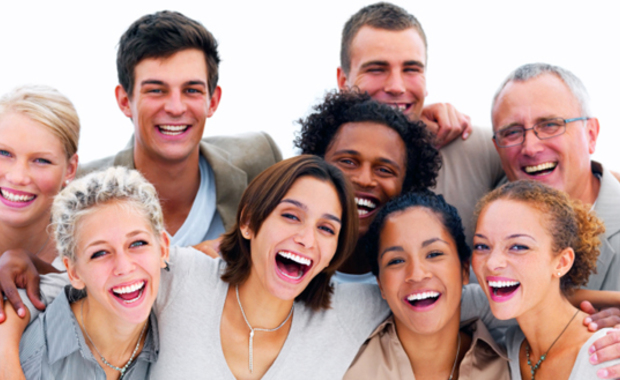

./images/faces/happy_people.jpg
sorrowLikelihood:  VERY_UNLIKELY
surpriseLikelihood:  VERY_UNLIKELY
joyLikelihood:  VERY_LIKELY
angerLikelihood:  VERY_UNLIKELY
sorrowLikelihood:  VERY_UNLIKELY
surpriseLikelihood:  VERY_UNLIKELY
joyLikelihood:  VERY_LIKELY
angerLikelihood:  VERY_UNLIKELY
sad_pegg.jpg
./images/faces/sad_pegg.jpg


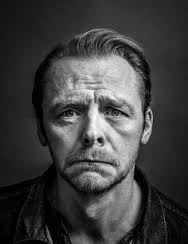

./images/faces/sad_pegg.jpg
sorrowLikelihood:  VERY_UNLIKELY
surpriseLikelihood:  VERY_UNLIKELY
joyLikelihood:  VERY_UNLIKELY
angerLikelihood:  POSSIBLE
xeinstein.jpg
./images/faces/xeinstein.jpg


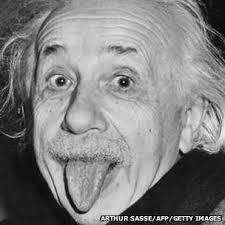

./images/faces/xeinstein.jpg
sorrowLikelihood:  VERY_UNLIKELY
surpriseLikelihood:  UNLIKELY
joyLikelihood:  POSSIBLE
angerLikelihood:  VERY_UNLIKELY


In [1]:
from IPython.display import display, Image
import base64
from googleapiclient import discovery
from oauth2client.client import GoogleCredentials
import json
import os, sys


# Setup
DISCOVERY_URL='https://{api}.googleapis.com/$discovery/rest?version={apiVersion}'
imagepath = './images/faces/'
dirs = os.listdir( imagepath )

"""Run a face detection request on a set of images"""

#Credentials file needs to be provided. See Google documentation on this. 
# https://developers.google.com/identity/protocols/OAuth2
# Sample below just uses a service account
# https://developers.google.com/identity/protocols/OAuth2#serviceaccount
credentials = GoogleCredentials.from_stream('CloudVisionPrj-3b7fedb71edc.json')
service = discovery.build('vision', 'v1', credentials=credentials,
                          discoveryServiceUrl=DISCOVERY_URL)

for image_file in dirs:
    print image_file
    imagefile = imagepath + image_file
    print imagefile
    display(Image(filename=imagefile))

    with open(imagefile, 'rb') as image:

        #base64 encode for the request
        image_content = base64.b64encode(image.read())
        service_request = service.images().annotate(body={
            'requests': [{
                'image': {
                    'content': image_content.decode('UTF-8')
                },
                'features': [{
                    'type': 'FACE_DETECTION',  #type of detection
                    'maxResults': 2 
                }]
            }]
        })

        response = service_request.execute()
        # Extract the description and some likelihoods.
        faces = response['responses'][0]['faceAnnotations']
        print imagefile
        for face in faces:
            print "sorrowLikelihood: ", face['sorrowLikelihood']
            print "surpriseLikelihood: ", face['surpriseLikelihood']
            print "joyLikelihood: ", face['joyLikelihood']
            print "angerLikelihood: ", face['angerLikelihood']
        #print(json.dumps(response, indent=2))
